## Домашнее задание 3

Стребежев Игорь

In [7]:
%%html
<style>video{width:480px;height:480px}</style>

In [6]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.animation
import matplotlib as mpl
% matplotlib inline
%config InlineBackend.figure_format = 'retina'
np.set_printoptions(threshold=np.inf)
plt.rc('animation', html='html5')
plt.rcParams["figure.figsize"] = 8, 8

### task 1

Найдите точку поломки, размерность Вапника-Червоненкиса и функцию роста для
классификаторов типа правило $x_i \geqslant a$ и $a \geqslant x_i \geqslant b$. Удостоверьтесь, что функция роста удовлетворяет неравенству $m(H) \leqslant \sum\limits_{j=0}^{d_{VC}}{\dbinom{n}{j}}$

#### Случай $x_i \geqslant a$

$k = 2$ — это break point, соответственно $d_{VC} = 1$.

У нас есть $n+1$ отрезков между точками, куда можно поставить вертикальную прямую $a$, поэтому $m_H(n) = n + 1 = \dbinom{n}{0} + \dbinom{n}{1} = \sum\limits_{j=0}^{d_{VC} = 1}{\dbinom{n}{j}}$


<img src="https://i.imgur.com/EDNW2Gt.jpg" width="600" align="left">

#### Случай $b \geqslant x_i \geqslant a$

$k = 3$ — это break point, соответственно $d_{VC} = 2$.

У нас есть $n+1$ отрезков между точками, куда можно поставить вертикальную прямую $a$, и $n$ оставшихся отрезков $b$. Если они попали в один отрезок, то они покрывают 0 точек, и нужно их пометить как -1. В итоге $m_H(n) = \dbinom{n}{2} + 1 = \dbinom{n}{0} + \dbinom{n}{2} \ \ \leqslant \dbinom{n}0 + \dbinom{n}1 + \dbinom{n}2 = \sum\limits_{j=0}^{d_{VC} = 2}{\dbinom{n}{j}}$


<img src="https://i.imgur.com/eojyJsQ.jpg" width="600" align="left">   

### task 2
Найдите разделяющую прямую с помощью алгоритма перцептрона с карманом для
датасета blobs2.csv, найдите получившуюся точность и визуализируйте результат.

Text(0,0.5,'y')

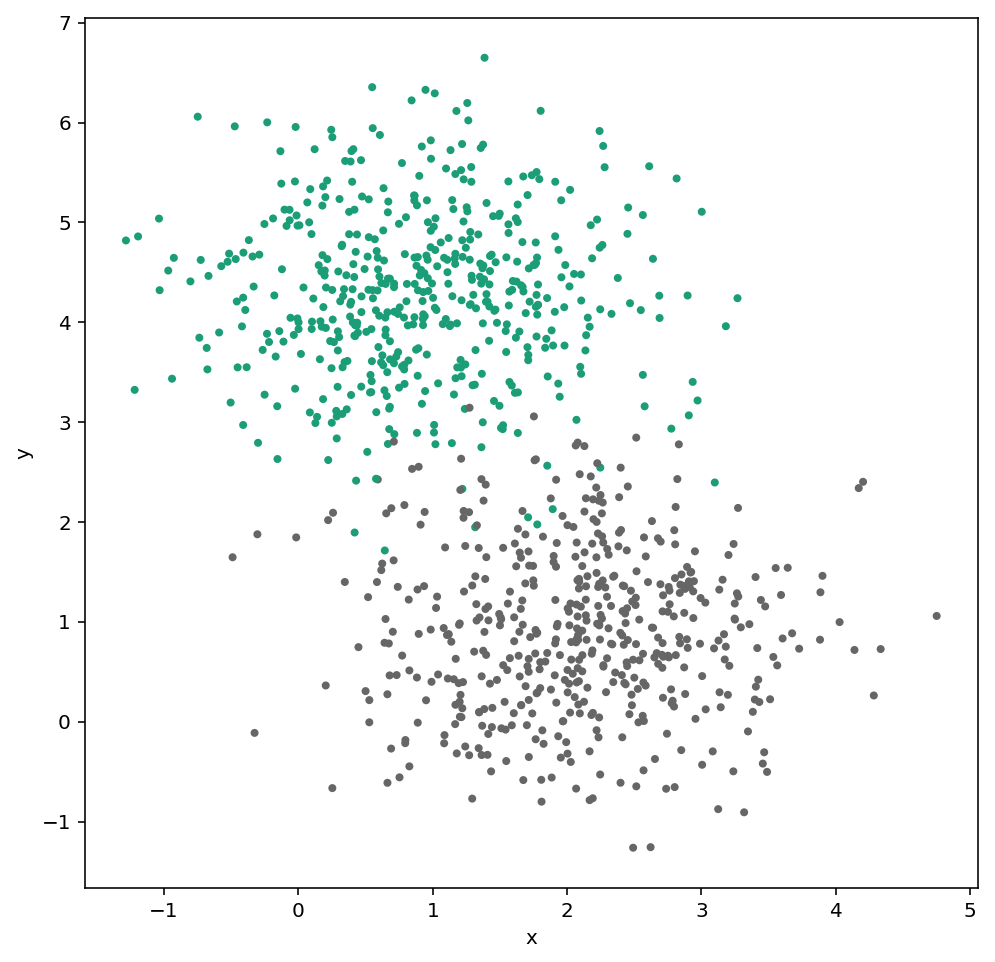

In [245]:
df = pd.read_csv(f'blobs2.csv')
X = df[['x', 'y']].as_matrix()
Y = df.label.values# * 2 - 1

plt.scatter(df.x, df.y, marker='.', c=Y, cmap='Dark2')
plt.xlabel('x'); plt.ylabel('y')

Я во многом ориентировался на [эту презентацию](https://www.cs.helsinki.fi/u/jkivinen/opetus/iml/2014/lecture09.pdf).<br>
Конкретно на 3ий слайд с псевдокодом и 18-19ые слайды про «The Pocket Algorithm»

In [247]:
def perceptron(X, Y):
    score, best = 0, []
    W = np.random.standard_normal(X.shape[1])
    Y = Y * 2 - 1
    
    for _ in range(10_000):
        bad = np.sign(X.dot(W)) != Y
        yxi = Y[:, np.newaxis] * X   # array of (yi * xi)
        W  += yxi[bad].mean(axis=0)  # instead of loop

        accuracy = (np.sign(X.dot(W)) == Y).mean()
        if accuracy > score:
            score, best = accuracy, W.copy()
    
    return best


def draw(X, Y, tX, eq):
    w  = perceptron(tX, Y)
    print('accuracy:', (Y == (tX.dot(w) > 0)).mean())
    
    lmin, lmax = X.min(0), X.max(0)
    xs = np.linspace(lmin[0], lmax[0], 1000)
    ys = np.linspace(lmin[1], lmax[1], 1000)
    xs, ys = np.meshgrid(xs, ys)
    
    plt.contourf(xs, ys, eq(w, xs, ys) < 0, alpha=0.05)
    plt.scatter(X[:, 0], X[:, 1], marker='.', c=Y, cmap='Dark2')

accuracy: 0.977


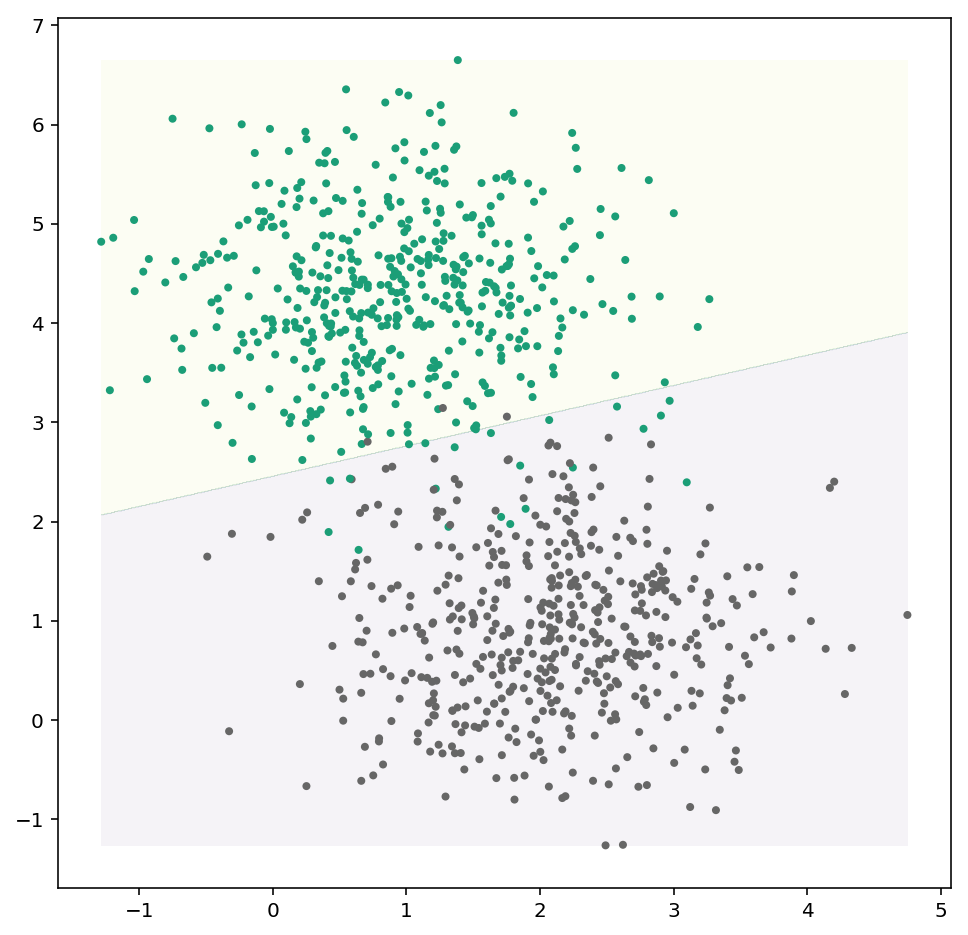

In [248]:
draw(X, Y, np.c_[ np.ones(Y.size), X ], lambda w, x, y: w[0] + w[1]*x + w[2]*y)

### task 3.1

Добавьте полиномиальные признаки второй степени $x^2,\ y^2,\ xy$ в датасет blobs2.csv, с
помощью алгоритма перцептрона с карманом найдите разделяющую гиперплоскость и
визуализируйте результат в виде кривой в исходном пространстве.

accuracy: 0.982


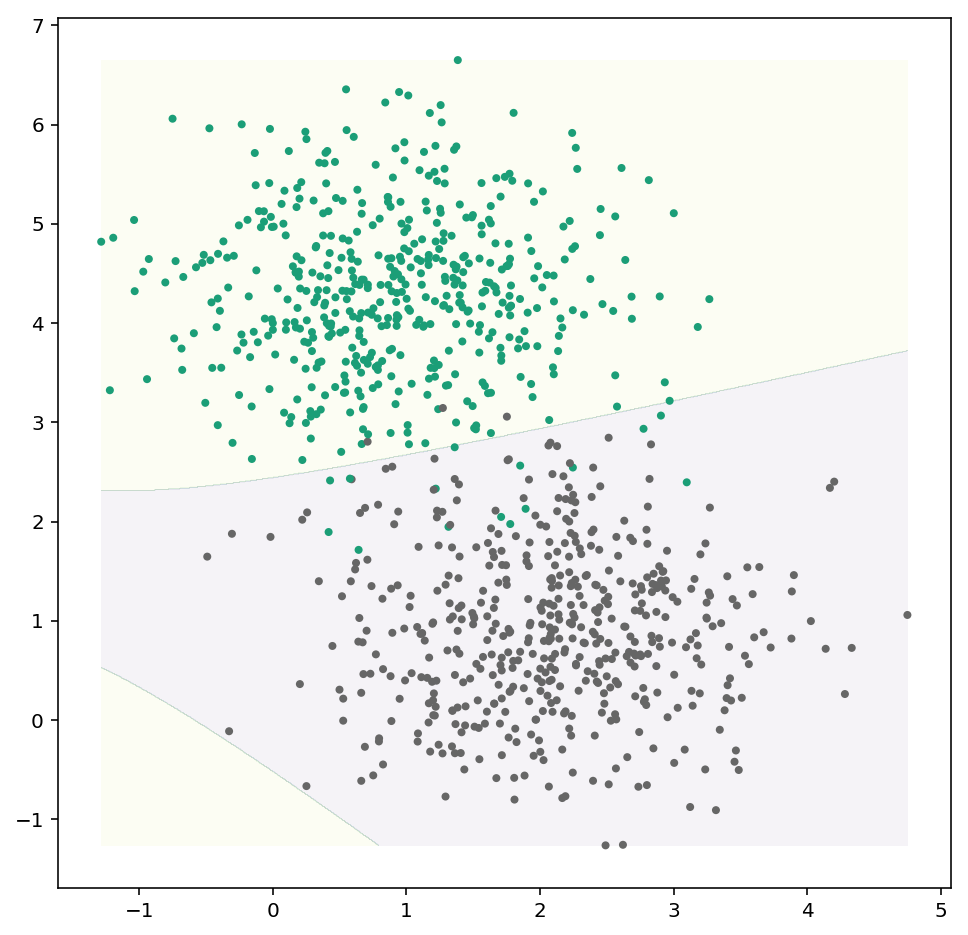

In [258]:
draw(X, Y, np.c_[ np.ones(Y.size), X, X**2, X[:, 0] * X[:, 1] ],
     lambda w, x, y: w[0] + w[1]*x + w[2]*y + w[3]*x*x + w[4]*y*y + w[5]*x*y)

### task 3.2
Сделайте то же самое с
полиномиальными признаками третьей степени.

accuracy: 0.986


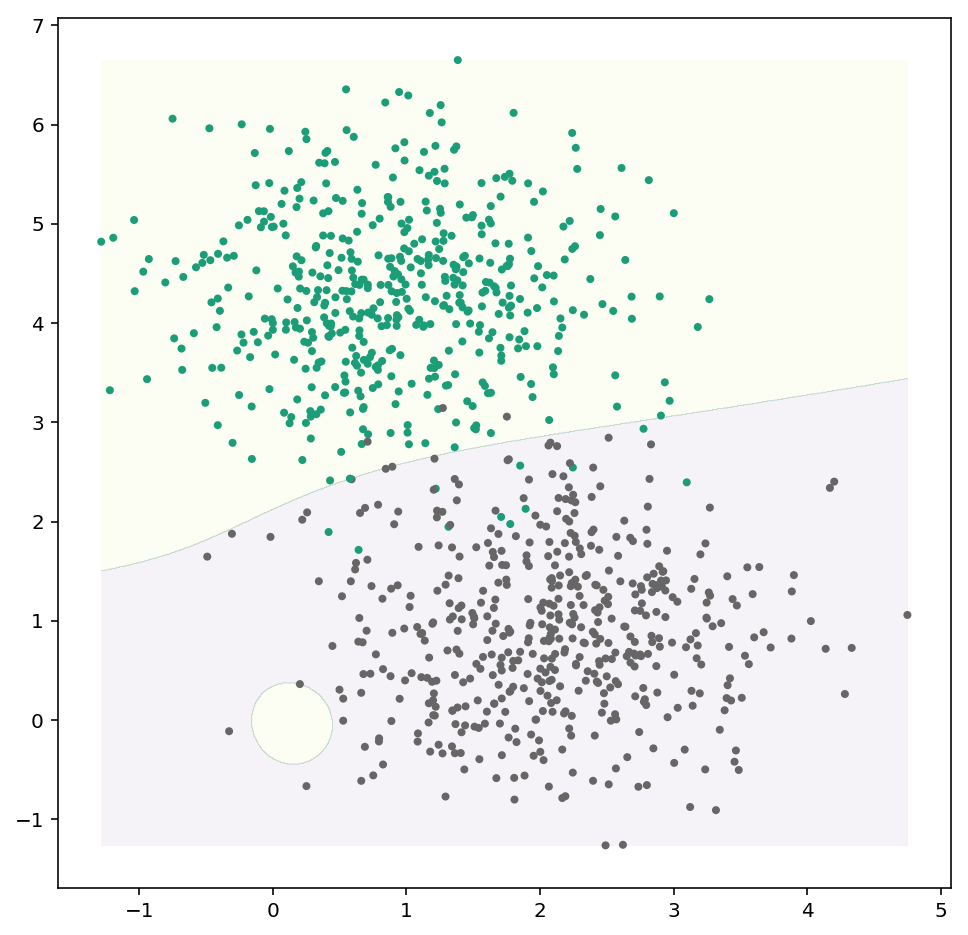

In [259]:
X1, X2 = X[:, 0], X[:, 1]

draw(X, Y, np.c_[ np.ones(Y.size), X, X**2, X1*X2, X**3, X1*X1*X2, X1*X2*X2 ],
     lambda w, x, y: w[0] + w[1]*x + w[2]*y +
                     w[3]*x*x + w[4]*y*y + w[5]*x*y + 
                     w[6]*x*x*x + w[7]*y*y*y + w[8]*x*x*y + w[9]*x*y*y)

### task 3.3
Сделайте то же самое с
полиномиальными признаками четвёртой степени.

accuracy: 0.987


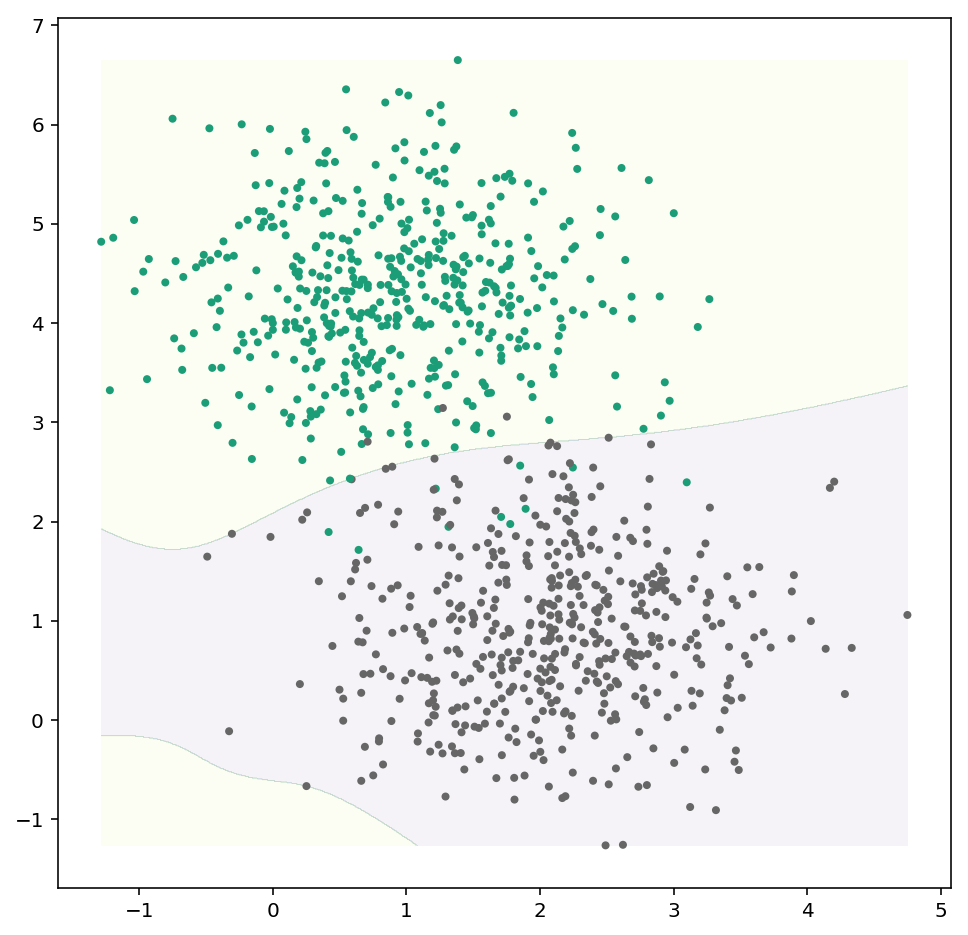

In [270]:
X1, X2 = X[:, 0], X[:, 1]
X11, X12, X22 = X1*X1, X1*X2, X2*X2
X111, X112, X122, X222 = X1*X11, X1*X12, X1*X22, X2*X22
X1111, X1112, X1122, X1222, X2222 = X1*X111, X1*X112, X1*X122, X1*X222, X2*X222

draw(X, Y, np.c_[
        np.ones(Y.size), X,
        X11, X22, X12,
        X111, X222, X112, X122,
        X1111, X2222, X1112, X1122, X1222],
     lambda w, x, y: w[0] + w[1]*x + w[2]*y +
                     w[3]*x*x + w[4]*y*y + w[5]*x*y + 
                     w[6]*x*x*x + w[7]*y*y*y + w[8]*x*x*y + w[9]*x*y*y +
                     w[10]*x*x*x*x + w[11]*y*y*y*y + w[12]*x*x*x*y + w[13]*x*x*y*y + w[14]*x*y*y*y)